# <u>COGS 109 - Final Project

- Servin Wayne Vartanian (A14802532)
- Yu Yong (A16078479)
- Cesar Grijalva (A12682658)
- Marlon Cortez (A14604525)

### Overview: 

In this project, we analyze how weight in adults is effected by various attributes. The dataset we are basing this analysis off is the "Estimation of Obesity Levels" dataset which we got from the UCI Machine Learning Repository. It has over 2100 instances and 17 attributes. 

To begin our Data Analysis, we first make a correlation matrix to see the relationship between different attributes and the weight attribute, which we'll use to guide parts of our analysis. The first major analysis we'll be doing is **Linear Regression**, in which we'll use selected attributes to make models that could then be used to predict a persons weight. We'll create and train many models, which we'll validate which ones are best fit to our data using their SSE and RMSE scores. Doing so will give us a few refined and fine tuned models which will, in theory, be helpful for people trying to predict the weight of adults from our dataset. 

The second half of our analysis will be **Clustering**, in which we cluster our data ##################. To do this, we will first perform Principal Component Analysis (PCA) to reduce the dimensionality of our data, then ### DO XYZ ######

### Research Questions:

Using a confusion matrix to predetermine certain input variables, which of these input variables would be optimal indicators of the perceived weight of a person?


### Dataset: 

- **Dataset Name:** "Estimation of Obesity Levels Based On Eating Habits and Physical Condition"
- **Dataset Link:** https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+
- **Dataset Shape:** 2111 (Instances) x 17 (Attributes)

We got this dataset from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php. The dataset presents obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The instances are labeled with a class variable "NObesity" (Obesity Level), that allows for classification of the data using its various values. Below, is a full list of all attributes in the dataset:

**Gender:** The person's gender.

**Age:** The person's age.

**Height:** The person's height.

**Weight:** The person's weight.

**Family** History With Overweight: yes/no if their family has a history with obisity.

**FAVC:** Frequent consumption of high caloric foods.

**FCVC:** Frequency of consumption of vegetables.

**NCP:** Number of main meals.

**CAEC:** Consumption of food between meals.

**SMOKE:** Whether they smoke or not.

**CH2O:** Consumption of water daily.

**SCC:** Calories consumption monitoring.

**FAF:** Physical activity frequency.

**TUE:** Time using technology devices (hours).

**MTRANS:** Transportation method used.

**CALC:** Consumption of alcohol.

**NObeyesdad:** Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

Lastly we'd like to thank the UCI Machine Learning Repository for providing free, open source datasets. If it wasn't for them, analysis like these wouldn't be available. 

## <u>Methods:

In [1]:
# Importing everything we will need for this project:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading in the data set:
ObesityData = pd.read_csv('ObesityDataSet.csv')

In [3]:
ObesityData.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Next, we'll check for any missing values:
if ObesityData.isnull().sum().sum() == 0:
    print("No NaN values")
else:
    print(ObesityData.isnull().sum().sum(), " NaN values")

No NaN values


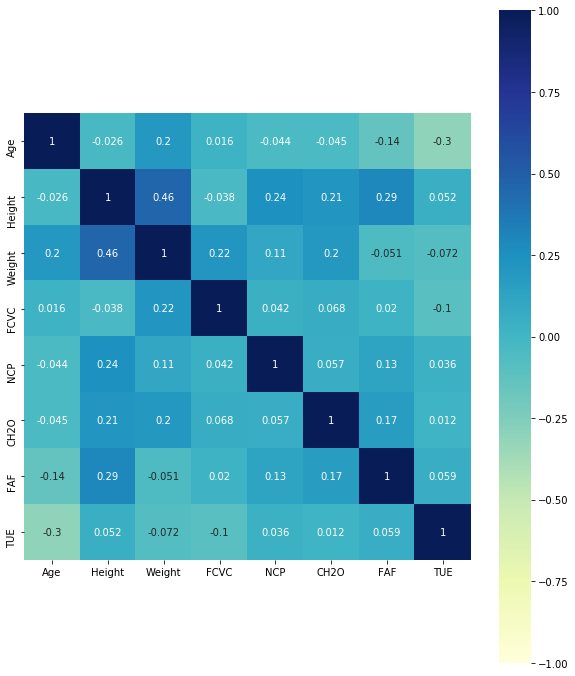

In [5]:
# Next, we create a Correlation Matrix to see the relationships of our columns.
ObCorr = ObesityData.corr()
plt.subplots(figsize = (10,12))
sns.heatmap(ObCorr, vmax = 1, vmin = -1, square = True, cmap="YlGnBu", annot = True)

In this correlation matrix we can see the most correlated variables in the dataset. Hoever, instead of choosing the most correlated variables to weight, creating univariate models on them and stating "These are the best models to predict weight", we decided to go down a more exploratory route for our analysis. We decided to choose 5 attributes to cross reference with weight. Two will be highly correlated ones, like Age and Weight. Another two will be the least corrolated variables to weight, FAF (frequency of Physical Activity) and TUE (Time Spent Using technology). The last Variable we'll choose is a categorical one, like Gender. 

Splitting our pool of Attributes to highly correlated, not correlated, and categorical data types, will diversify our model creation process and allow us to create some truly unique models that can take in a variety of inputs, and give out one continuos output, weight! 

In [6]:
# We extract the required columns:

# Encoding Female/Male as binary data.
ObesityData['Gender'] = ObesityData['Gender'].replace('Female', 0)
ObesityData['Gender'] = ObesityData['Gender'].replace('Male', 1)
gender = ObesityData['Gender']

age = ObesityData['Age']
height = ObesityData['Height']
techtime = ObesityData['TUE']
activetime = ObesityData['FAF']
weight = ObesityData['Weight']

## First Analysis: Linear Regression With Cross Validation

Having extracted these variables from our dataframe, we can now begin performing multivariate linear regression. To do this, we performed linear regression with cross validation using two different model types: Model 1 (M1) and Model 2 (M2). For Model 1, we analyzed the relation each variable had with weight to see if any relevant results would emerge. Model 2 utilized two or more variables to see if their joint presence had any different impact on weight. We then drew conclusions per model type about which combination of variables had a more drastic impact on weight. 

Additionally, we split our data into training and testing partitions. We then solved our weights and got our prediction models which we used to plot a linear regression scatterplot to see how profound of an impact they have on the weight. Then we calculated their SSE and RMSE to see which 1st degree model best fit our data. 

#### Model 1's (M1):

<font color='#0066A4'>$weight = w0 + w1(gender)$</font>

<font color='#0066A4'>$weight = w0 + w1(age)$</font>

<font color='#0066A4'>$weight = w0 + w1(height)$</font>

<font color='#0066A4'>$weight = w0 + w1(techtime)$</font>

<font color='#0066A4'>$weight = w0 + w1(activetime)$</font>

#### Model 2's (M2): 

<font color='#0066A4'>$weight = w0 + w1(age) + w2(gender)$</font>

<font color='#0066A4'>$weight = w0 + w1(age) + w2(height)$</font>

<font color='#0066A4'>$weight = w0 + w1(age) + w2(techtime)$</font>

<font color='#0066A4'>$weight = w0 + w1(age) + w2(activetime)$</font>

<font color='#0066A4'>$weight = w0 + w1(gender) + w2(height)$</font>

<font color='#0066A4'>$weight = w0 + w1(gender) + w2(techtime)$</font>

<font color='#0066A4'>$weight = w0 + w1(gender) + w2(activetime)$</font>

<font color='#0066A4'>$weight = w0 + w1(height) + w2(techtime)$</font>

<font color='#0066A4'>$weight = w0 + w1(height) + w2(activitytime)$</font>

<font color='#0066A4'>$quality = w0 + w1(techtime) + w2(activitytime)$</font>

In [7]:
# For model M1 (gender).

# Assigning variables to columns. 
X1 = gender
Y = weight

# Splitting x and y for training(75%) and testing(25%).
Xtrain1, Xtest1, Ytrain1, Ytest1 = model_selection.train_test_split(X1, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they can concat properly.
Xtrain1 = Xtrain1.reset_index(drop = True)
Ytrain1 = Ytrain1.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A1. 
frames1 = [ones,Xtrain1]
A1 = pd.concat(frames1, axis = 1, sort = True)

# Solving for w, the weight vector.
w1 = np.linalg.lstsq(A1, Ytrain1)[0]
print('The weight vector for M1 (gender) is:', w1)
print('Model 1 (gender) is: weight =', w1[0], '+', w1[1], '*(gender)')

The weight vector for M1 (gender) is: [82.12869425  8.40258935]
Model 1 (gender) is: weight = 82.1286942522292 + 8.402589350527581 *(gender)


In [8]:
# For model M1 (age).

# Assigning variables to columns. 
X2 = age
Y = weight

# Splitting x and y for training(75%) and testing(25%).
Xtrain2, Xtest2, Ytrain2, Ytest2 = model_selection.train_test_split(X2, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they can concat properly.
Xtrain2 = Xtrain2.reset_index(drop = True)
Ytrain2 = Ytrain2.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A2. 
frames2 = [ones,Xtrain2]
A2 = pd.concat(frames2, axis = 1, sort = True)

# Solving for w, the weight vector.
w2 = np.linalg.lstsq(A2, Ytrain2)[0]
print('The weight vector for M1 (age) is:', w2)
print('Model 1 (age) is: weight =', w2[0], '+', w2[1], '*(age)')

The weight vector for M1 (age) is: [64.33057853  0.89678302]
Model 1 (age) is: weight = 64.33057852939457 + 0.8967830209346258 *(age)


In [9]:
# For model M1 (height).

# Assigning variables to columns. 
X3 = height
Y = weight

# Splitting x and y for training(75%) and testing(25%).
Xtrain3, Xtest3, Ytrain3, Ytest3 = model_selection.train_test_split(X3, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they can concat properly.
Xtrain3 = Xtrain3.reset_index(drop = True)
Ytrain3 = Ytrain3.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A3. 
frames = [ones,Xtrain3]
A3 = pd.concat(frames, axis = 1, sort = True)

# Solving for w, the weight vector.
w3 = np.linalg.lstsq(A3, Ytrain3)[0]
print('The weight vector for M1 (height) is:', w3)
print('Model 1 (height) is: weight =', w3[0], '+', w3[1], '*(height)')

The weight vector for M1 (height) is: [-135.11204552  130.1521572 ]
Model 1 (height) is: weight = -135.11204551897455 + 130.15215720030213 *(height)


In [10]:
# For model M1 (techtime).

# Assigning variables to columns. 
X4 = techtime
Y = weight

# Splitting x and y for training(75%) and testing(25%).
Xtrain4, Xtest4, Ytrain4, Ytest4 = model_selection.train_test_split(X4, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they can concat properly.
Xtrain4 = Xtrain4.reset_index(drop = True)
Ytrain4 = Ytrain4.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A4. 
frames4 = [ones,Xtrain4]
A4 = pd.concat(frames4, axis = 1, sort = True)

# Solving for w, the weight vector.
w4 = np.linalg.lstsq(A4, Ytrain4)[0]
print('The weight vector for M1 (techtime) is:', w4)
print('Model 1 (techtime) is: weight =', w4[0], '+', w4[1], '*(techtime)')

The weight vector for M4 (techtime) is: [88.14979663 -2.80772621]
Model 1 (techtime) is: weight = 88.14979663382302 + -2.807726212623631 *(techtime)


In [11]:
# For model M1 (activetime).

# Assigning variables to columns. 
X5 = activetime
Y = weight

# Splitting x and y for training(75%) and testing(25%).
Xtrain5, Xtest5, Ytrain5, Ytest5 = model_selection.train_test_split(X5, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they can concat properly.
Xtrain5 = Xtrain5.reset_index(drop = True)
Ytrain5 = Ytrain5.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A5. 
frames5 = [ones,Xtrain5]
A5 = pd.concat(frames5, axis = 1, sort = True)

# Solving for w, the weight vector.
w5 = np.linalg.lstsq(A5, Ytrain5)[0]
print('The weight vector for M1 (activetime) is:', w5)
print('Model 1 (activetime) is: weight =', w5[0], '+', w5[1], '*(activetime)')

The weight vector for M4 (activetime) is: [87.79906189 -1.36027073]
Model 1 (activetime) is: weight = 87.79906188914119 + -1.3602707335931097 *(activetime)


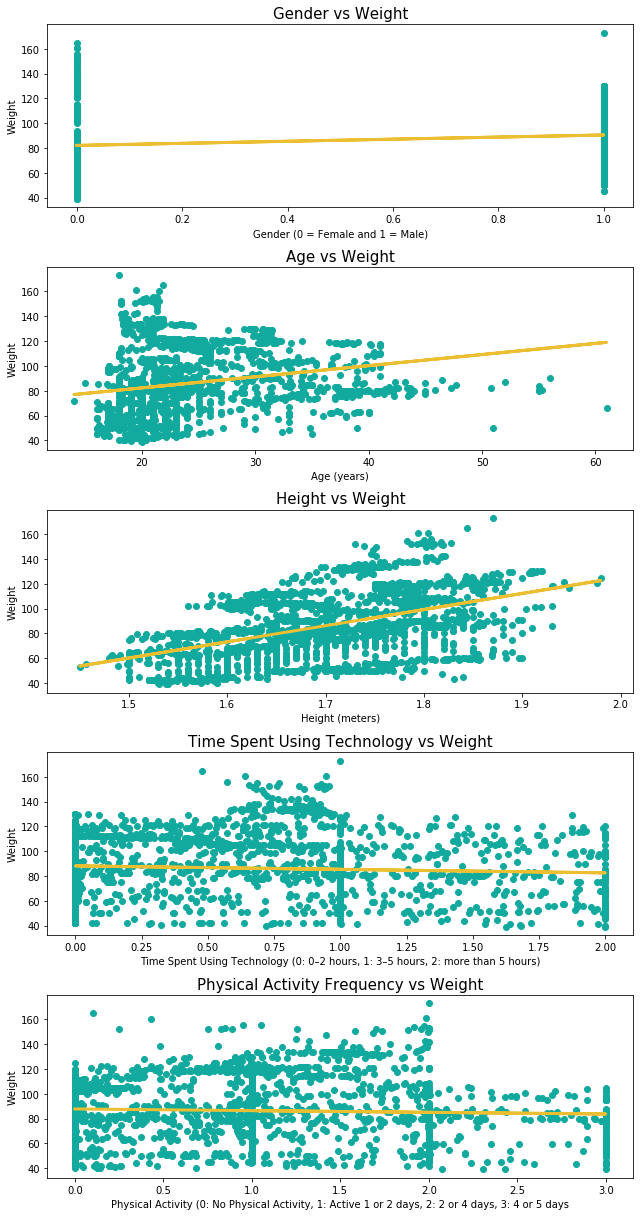

In [12]:
# Creating graphs for the M1 models.

# Coding the models as variables.
y1 = w1[0] + w1[1]*X1
y2 = w2[0] + w2[1]*X2
y3 = w3[0] + w3[1]*X3
y4 = w4[0] + w4[1]*X4
y5 = w5[0] + w5[1]*X5

# Creating code for subplots:
fig, axs = plt.subplots(5, figsize = (9,17))
axs[0].set_title('Gender vs Weight', {'fontsize': 15})
axs[1].set_title('Age vs Weight', {'fontsize': 15})
axs[2].set_title('Height vs Weight', {'fontsize': 15})
axs[3].set_title('Time Spent Using Technology vs Weight', {'fontsize': 15})
axs[4].set_title('Physical Activity Frequency vs Weight', {'fontsize': 15})

axs[0].scatter(X1, Y, color = '#12A99E')
axs[1].scatter(X2, Y, color = '#12A99E')
axs[2].scatter(X3, Y, color = '#12A99E')
axs[3].scatter(X4, Y, color = '#12A99E')
axs[4].scatter(X5, Y, color = '#12A99E')

axs[0].set_xlabel("Gender (0 = Female and 1 = Male)")
axs[1].set_xlabel("Age (years)")
axs[2].set_xlabel("Height (meters)")
axs[3].set_xlabel("Time Spent Using Technology (0: 0–2 hours, 1: 3–5 hours, 2: more than 5 hours)")
axs[4].set_xlabel("Physical Activity (0: No Physical Activity, 1: Active 1 or 2 days, 2: 2 or 4 days, 3: 4 or 5 days")

axs[0].set_ylabel("Weight")
axs[1].set_ylabel("Weight")
axs[2].set_ylabel("Weight")
axs[3].set_ylabel("Weight")
axs[4].set_ylabel("Weight")

axs[0].plot(X1, y1, c = '#ECBF33', linewidth = 3.0)
axs[1].plot(X2, y2, c = '#ECBF33', linewidth = 3.0)
axs[2].plot(X3, y3, c = '#ECBF33', linewidth = 3.0)
axs[3].plot(X4, y4, c = '#ECBF33', linewidth = 3.0)
axs[4].plot(X5, y5, c = '#ECBF33', linewidth = 3.0)


fig.tight_layout()

Here are some results we can gather by taking a quick glance at our regression graphs:

**Gender:** When looking at our regression graph for gender, we saw very little discrepancy in weight difference between being a male or female. Males do seem to weigh slightly heavier than females, but overall there's nothing noteworthy here to report.

**Age:** As for age, we found a strong correlation between age and weight with weight increasing as age does for both genders. 

**Height:** Another positive correlation was found between height and weight. While we can not determine whether that weight is muscle mass or fat, as the dataset does not provide a BMI or muscle mass/fat percentage data, we can reliably say taller people weigh more.

**Time Spent with Technology:** The graph for Time Using Technology showed a slight decrease in weight the more individuals interacted with technology. 

**Physical Activity Frequency:** When looking at the regression result for Physical Activity Frequency, a slight decrease in weight was shown the more individuals exercised. 

It is important to note that just because this univariate model found no correlation between its variable and weight, it does not mean one does not exist once we moved into the multivariate realm. This is where our multivariate, M2, models came into play.

In [13]:
# For model M2 (age and gender).

X6 = ObesityData[["Age","Gender"]]
X6 = pd.DataFrame(X6)
Y = ObesityData["Weight"]
Y = pd.DataFrame(Y)

# Split x and y for training(75%) and testing (25%).
Xtrain6, Xtest6, Ytrain6, Ytest6 = model_selection.train_test_split(X6, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they concat properly.
Xtrain6 = Xtrain6.reset_index(drop = True)
Ytrain6 = Ytrain6.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A6. 
frames6 = [ones,Xtrain6]
A6 = pd.concat(frames6, axis = 1,sort = True)

# Solving for w, the weight vector.
w6 = np.linalg.lstsq(A6,Ytrain6)[0]
print('\n The weight vector is:\n', w6)
print('\n The Multivariate Model for Age and Gender is:\n Weight =', 
      w6[0], '+', w6[1], '*(age) +', w6[2], '*(gender)')


 The weight vector is:
 [[61.79726184]
 [ 0.83814657]
 [ 8.82741779]]

 The Multivariate Model for Age and Gender is:
 Weight = [61.79726184] + [0.83814657] *(age) + [8.82741779] *(gender)


In [14]:
# For model M2 (age and height).

X7 = ObesityData[["Age","Height"]]
X7 = pd.DataFrame(X7)
Y = ObesityData["Weight"]
Y = pd.DataFrame(Y)

# Split x and y for training(75%) and testing (25%).
Xtrain7, Xtest7, Ytrain7, Ytest7 = model_selection.train_test_split(X7, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they concat properly.
Xtrain7 = Xtrain7.reset_index(drop = True)
Ytrain7 = Ytrain7.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A7. 
frames7 = [ones,Xtrain7]
A7 = pd.concat(frames7, axis = 1,sort = True)

# Solving for w, the weight vector.
w7 = np.linalg.lstsq(A7,Ytrain7)[0]
print('\n The weight vector is:\n',  w7)
print('\n The Multivariate Model for Age and Height is:\n Weight =', 
      w7[0], '+', w7[1], '*(age) +', w7[2], '*(height)')


 The weight vector is:
 [[-155.96080573]
 [   0.88735306]
 [ 130.00501184]]

 The Multivariate Model for Age and Height is:
 Weight = [-155.96080573] + [0.88735306] *(age) + [130.00501184] *(height)


In [15]:
# For model M2 (age and techtime).

X8 = ObesityData[["Age","TUE"]]
X8 = pd.DataFrame(X8)
Y = ObesityData["Weight"]
Y = pd.DataFrame(Y)

# Split x and y for training(75%) and testing (25%).
Xtrain8, Xtest8, Ytrain8, Ytest8 = model_selection.train_test_split(X8, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they concat properly.
Xtrain8 = Xtrain8.reset_index(drop = True)
Ytrain8 = Ytrain8.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A8. 
frames8 = [ones,Xtrain8]
A8 = pd.concat(frames8, axis = 1,sort = True)

# Solving for w, the weight vector.
w8 = np.linalg.lstsq(A8,Ytrain8)[0]
print('\n The weight vector is:\n',  w8)
print('\n The Multivariate Model for Age and Techtime is:\n Weight =',
      w8[0], '+', w8[1], '*(age) +', w8[2], '*(techtime)')


 The weight vector is:
 [[67.4664496 ]
 [ 0.79617629]
 [-0.62315962]]

 The Multivariate Model for Age and Techtime is:
 Weight = [67.4664496] + [0.79617629] *(age) + [-0.62315962] *(techtime)


In [16]:
# For model M2 (age and activetime).

X9 = ObesityData[["Age","FAF"]]
X9 = pd.DataFrame(X9)
Y = ObesityData["Weight"]
Y = pd.DataFrame(Y)

# Split x and y for training(75%) and testing (25%).
Xtrain9, Xtest9, Ytrain9, Ytest9 = model_selection.train_test_split(X9, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they concat properly.
Xtrain9 = Xtrain9.reset_index(drop = True)
Ytrain9 = Ytrain9.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A9. 
frames9 = [ones,Xtrain9]
A9 = pd.concat(frames9, axis = 1, sort = True)

# Solving for w, the weight vector.
w9 = np.linalg.lstsq(A9, Ytrain9)[0]
print('\n The weight vector is:\n', w9)
print('\n The Multivariate Model for Age and Activetime is:\n Weight =', 
      w9[0], '+', w9[1], '*(age) +', w9[2], '*(activetime)')


 The weight vector is:
 [[66.63620088]
 [ 0.84058978]
 [-0.40168437]]

 The Multivariate Model for Age and Activetime is:
 Weight = [66.63620088] + [0.84058978] *(age) + [-0.40168437] *(activetime)


In [17]:
# For model M2 (gender and height).

X10 = ObesityData[["Gender","Height"]]
X10 = pd.DataFrame(X10)
Y = ObesityData["Weight"]
Y = pd.DataFrame(Y)

# Split x and y for training(75%) and testing (25%).
Xtrain10, Xtest10, Ytrain10, Ytest10 = model_selection.train_test_split(X10, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they concat properly.
Xtrain10 = Xtrain10.reset_index(drop = True)
Ytrain10 = Ytrain10.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A10. 
frames10 = [ones,Xtrain10]
A10 = pd.concat(frames10, axis = 1, sort = True)

# Solving for w, the weight vector.
w10 = np.linalg.lstsq(A10, Ytrain10)[0]
print('\n The weight vector is:\n', w10)
print('\n The Multivariate Model for Gender and Height is:\n Weight =', 
      w10[0], '+', w10[1], '*(gender) +', w10[2], '*(height)')


 The weight vector is:
 [[-183.22404155]
 [ -10.11228695]
 [ 161.64382122]]

 The Multivariate Model for Gender and Height is:
 Weight = [-183.22404155] + [-10.11228695] *(gender) + [161.64382122] *(height)


In [18]:
# For model M2 (gender and techtime).

X11 = ObesityData[["Gender","TUE"]]
X11 = pd.DataFrame(X11)
Y = ObesityData["Weight"]
Y = pd.DataFrame(Y)

# Split x and y for training(75%) and testing (25%).
Xtrain11, Xtest11, Ytrain11, Ytest11 = model_selection.train_test_split(X11, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they concat properly.
Xtrain11 = Xtrain11.reset_index(drop = True)
Ytrain11 = Ytrain11.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A11. 
frames11 = [ones,Xtrain11]
A11 = pd.concat(frames11, axis = 1, sort = True)

# Solving for w, the weight vector.
w11 = np.linalg.lstsq(A11, Ytrain11)[0]
print('\n The weight vector is:\n', w11)
print('\n The Multivariate Model for Gender and Techtime is:\n Weight =', w11[0], '+', 
      w11[1], '*(gender) +', w11[2], '*(techtime)')


 The weight vector is:
 [[84.09573982]
 [ 9.56581409]
 [-3.3366158 ]]

 The Multivariate Model for Gender and Techtime is:
 Weight = [84.09573982] + [9.56581409] *(gender) + [-3.3366158] *(techtime)


In [19]:
# For model M2 (gender and activetime).

X12 = ObesityData[["Gender","FAF"]]
X12 = pd.DataFrame(X12)
Y = ObesityData["Weight"]
Y = pd.DataFrame(Y)

# Split x and y for training(75%) and testing (25%).
Xtrain12, Xtest12, Ytrain12, Ytest12 = model_selection.train_test_split(X12, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they concat properly.
Xtrain12 = Xtrain12.reset_index(drop = True)
Ytrain12 = Ytrain12.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A12. 
frames12 = [ones,Xtrain12]
A12 = pd.concat(frames12, axis = 1, sort = True)

# Solving for w, the weight vector.
w12 = np.linalg.lstsq(A12, Ytrain12)[0]
print('\n The weight vector is:\n', w12)
print('\n The Multivariate Model for Gender and Activetimte is:\n Weight =',
      w12[0], '+', w12[1], '*(gender) +', w12[2], '*(activetime)')


 The weight vector is:
 [[83.81280412]
 [10.29049239]
 [-2.80101073]]

 The Multivariate Model for Gender and Activetimte is:
 Weight = [83.81280412] + [10.29049239] *(gender) + [-2.80101073] *(activetime)


In [20]:
# For model M2 (height and techtime).

X13 = ObesityData[["Height","TUE"]]
X13 = pd.DataFrame(X13)
Y = ObesityData["Weight"]
Y = pd.DataFrame(Y)

# Split x and y for training(75%) and testing (25%).
Xtrain13, Xtest13, Ytrain13, Ytest13 = model_selection.train_test_split(X13, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they concat properly.
Xtrain13 = Xtrain13.reset_index(drop = True)
Ytrain13 = Ytrain13.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A13. 
frames13 = [ones,Xtrain13]
A13 = pd.concat(frames13, axis = 1, sort = True)

# Solving for w, the weight vector.
w13 = np.linalg.lstsq(A13, Ytrain13)[0]
print('\n The weight vector is:\n', w13)
print('\n The Multivariate Model for Height and Techtime is:\n Weight =', 
      w13[0], '+', w13[1], '*(height) +', w13[2], '*(techtime)')


 The weight vector is:
 [[-135.63267999]
 [ 131.80294641]
 [  -3.40192632]]

 The Multivariate Model for Height and Techtime is:
 Weight = [-135.63267999] + [131.80294641] *(height) + [-3.40192632] *(techtime)


In [21]:
# For model M2 (height and activetime).

X14 = ObesityData[["Height","FAF"]]
X14 = pd.DataFrame(X14)
Y = ObesityData["Weight"]
Y = pd.DataFrame(Y)

# Split x and y for training(75%) and testing (25%).
Xtrain14, Xtest14, Ytrain14, Ytest14 = model_selection.train_test_split(X14, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they concat properly.
Xtrain14 = Xtrain14.reset_index(drop = True)
Ytrain14 = Ytrain14.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A14. 
frames14 = [ones,Xtrain14]
A14 = pd.concat(frames14, axis = 1, sort = True)

# Solving for w, the weight vector.
w14 = np.linalg.lstsq(A14, Ytrain14)[0]
print('\n The weight vector is:\n', w14)
print('\n The Multivariate Model for Height and Activetimte is:\n Weight =',
      w14[0], '+', w14[1], '*(height) +', w14[2], '*(activetime)')


 The weight vector is:
 [[-157.70262952]
 [ 147.22259209]
 [  -6.00678105]]

 The Multivariate Model for Height and Activetimte is:
 Weight = [-157.70262952] + [147.22259209] *(height) + [-6.00678105] *(activetime)


In [22]:
# For model M2 (techtime and activetime).

X15 = ObesityData[["TUE","FAF"]]
X15 = pd.DataFrame(X15)
Y = ObesityData["Weight"]
Y = pd.DataFrame(Y)

# Split x and y for training(75%) and testing (25%).
Xtrain15, Xtest15, Ytrain15, Ytest15 = model_selection.train_test_split(X15, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they concat properly.
Xtrain15 = Xtrain15.reset_index(drop = True)
Ytrain15 = Ytrain15.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A15. 
frames15 = [ones, Xtrain15]
A15 = pd.concat(frames15, axis = 1, sort = True)

# Solving for w, the weight vector.
w15 = np.linalg.lstsq(A15, Ytrain15)[0]
print('\n The weight vector is:\n', w15)
print('\n The Multivariate Model for Techtime and Activetimte is:\n Weight =',
      w15[0], '+', w15[1], '*(techtime) +', w15[2], '*(activetime)')


 The weight vector is:
 [[89.66356657]
 [-2.36668828]
 [-1.21972413]]

 The Multivariate Model for Techtime and Activetimte is:
 Weight = [89.66356657] + [-2.36668828] *(techtime) + [-1.21972413] *(activetime)


### Calculating SSEs and RMSEs:

In [23]:
# Defining all Y's and Y-bars for the upcoming RMSE calculations
# Converting them to np arrays. 

# For Model 1 (gender):
y_train1 = Ytrain1
M1_train_gender_y_bar = w1[0] + w1[1]*(Xtrain1)
M1_train_gender_y_bar = np.array(M1_train_gender_y_bar)
y_train1 = np.array(y_train1)

y_test1 = Ytest1
M1_test_gender_y_bar = w1[0] + w1[1]*(Xtest1)
M1_test_gender_y_bar = np.array(M1_test_gender_y_bar)
y_test1 = np.array(y_test1)

# For Model 1 (age):
y_train2 = Ytrain2
M1_train_age_y_bar = w2[0] + w2[1]*(Xtrain2)
M1_train_age_y_bar = np.array(M1_train_age_y_bar)
y_train2 = np.array(y_train2)

y_test2 = Ytest2
M1_test_age_y_bar = w2[0] + w2[1]*(Xtest2)
M1_test_age_y_bar = np.array(M1_test_age_y_bar)
y_test2 = np.array(y_test2)

# For Model 1 (height):
y_train3 = Ytrain3
M1_train_height_y_bar = w3[0] + w3[1]*(Xtrain3)
M1_train_height_y_bar = np.array(M1_train_height_y_bar)
y_train3 = np.array(y_train3)

y_test3 = Ytest3
M1_test_height_y_bar = w3[0] + w3[1]*(Xtest3)
M1_test_height_y_bar = np.array(M1_test_height_y_bar)
y_test3 = np.array(y_test3)

# For Model 1 (techtime):
y_train4 = Ytrain4
M1_train_techtime_y_bar = w4[0] + w4[1]*(Xtrain4)
M1_train_techtime_y_bar = np.array(M1_train_techtime_y_bar)
y_train4 = np.array(y_train4)

y_test4 = Ytest4
M1_test_techtime_y_bar = w4[0] + w4[1]*(Xtest4)
M1_test_techtime_y_bar = np.array(M1_test_techtime_y_bar)
y_test4 = np.array(y_test4)

# For Model 1 (activetime):
y_train5 = Ytrain5
M1_train_activetime_y_bar = w5[0] + w5[1]*(Xtrain5)
M1_train_activetime_y_bar = np.array(M1_train_activetime_y_bar)
y_train5 = np.array(y_train5)

y_test5 = Ytest5
M1_test_activetime_y_bar = w5[0] + w5[1]*(Xtest5)
M1_test_activetime_y_bar = np.array(M1_test_activetime_y_bar)
y_test5 = np.array(y_test5)

# For Model 2 (age and gender):
y_train6 = Ytrain6
M2_train_ageandgender_y_bar = w6[0] + w6[1]*(Xtrain6['Age']) + w6[2]*(Xtrain6['Gender'])
M2_train_ageandgender_y_bar = np.array(M2_train_ageandgender_y_bar)
y_train6 = np.array(y_train6)

y_test6 = Ytest6
M2_test_ageandgender_y_bar = w6[0] + w6[1]*(Xtest6['Age']) + w6[2]*(Xtest6['Gender'])
M2_test_ageandgender_y_bar = np.array(M2_test_ageandgender_y_bar)
y_test6 = np.array(y_test6)

# For Model 2 (age and height):
y_train7 = Ytrain7
M2_train_ageandheight_y_bar = w7[0] + w7[1]*(Xtrain7['Age']) + w7[2]*(Xtrain7['Height'])
M2_train_ageandheight_y_bar = np.array(M2_train_ageandheight_y_bar)
y_train7 = np.array(y_train7)

y_test7 = Ytest7
M2_test_ageandheight_y_bar = w7[0] + w7[1]*(Xtest7['Age']) + w7[2]*(Xtest7['Height'])
M2_test_ageandheight_y_bar = np.array(M2_test_ageandheight_y_bar)
y_test7 = np.array(y_test7)

# For Model 2 (age and techtime):
y_train8 = Ytrain8
M2_train_ageandtechtime_y_bar = w8[0] + w8[1]*(Xtrain8['Age']) + w8[2]*(Xtrain8['TUE'])
M2_train_ageandtechtime_y_bar = np.array(M2_train_ageandtechtime_y_bar)
y_train8 = np.array(y_train8)

y_test8 = Ytest8
M2_test_ageandtechtime_y_bar = w8[0] + w8[1]*(Xtest8['Age']) + w8[2]*(Xtest8['TUE'])
M2_test_ageandtechtime_y_bar = np.array(M2_test_ageandtechtime_y_bar)
y_test8 = np.array(y_test8)

# For Model 2 (age and activetime):
y_train9 = Ytrain9
M2_train_ageandactivetime_y_bar = w9[0] + w9[1]*(Xtrain9['Age']) + w9[2]*(Xtrain9['FAF'])
M2_train_ageandactivetime_y_bar = np.array(M2_train_ageandactivetime_y_bar)
y_train9 = np.array(y_train9)

y_test9 = Ytest9
M2_test_ageandactivetime_y_bar = w9[0] + w9[1]*(Xtest9['Age']) + w9[2]*(Xtest9['FAF'])
M2_test_ageandactivetime_y_bar = np.array(M2_test_ageandactivetime_y_bar)
y_test9 = np.array(y_test9)

# For Model 2 (gender and height):
y_train10 = Ytrain10
M2_train_genderandheight_y_bar = w10[0] + w10[1]*(Xtrain10["Gender"]) + w10[2]*(Xtrain10["Height"])
M2_train_genderandheight_y_bar = np.array(M2_train_genderandheight_y_bar)
y_train10 = np.array(y_train10)

y_test10 = Ytest10
M2_test_genderandheight_y_bar = w10[0] + w10[1]*(Xtest10["Gender"]) + w10[2]*(Xtest10["Height"])
M2_test_genderandheight_y_bar = np.array(M2_test_genderandheight_y_bar)
y_test10 = np.array(y_test10)

# For Model 2 (gender and techtime):
y_train11 = Ytrain11
M2_train_genderandtechtime_y_bar = w11[0] + w11[1]*(Xtrain11["Gender"]) + w11[2]*(Xtrain11["TUE"])
M2_train_genderandtechtime_y_bar = np.array(M2_train_genderandtechtime_y_bar)
y_train11 = np.array(y_train11)

y_test11 = Ytest11
M2_test_genderandtechtime_y_bar = w11[0] + w11[1]*(Xtest11["Gender"]) + w11[2]*(Xtest11["TUE"])
M2_test_genderandtechtime_y_bar = np.array(M2_test_genderandtechtime_y_bar)
y_test11 = np.array(y_test11)

# For Model 2 (gender and activetime):
y_train12 = Ytrain12
M2_train_genderandactivetime_y_bar = w12[0] + w12[1]*(Xtrain12["Gender"]) + w12[2]*(Xtrain12["FAF"])
M2_train_genderandactivetime_y_bar = np.array(M2_train_genderandactivetime_y_bar)
y_train12 = np.array(y_train12)

y_test12 = Ytest12
M2_test_genderandactivetime_y_bar = w12[0] + w12[1]*(Xtest12["Gender"]) + w12[2]*(Xtest12["FAF"])
M2_test_genderandactivetime_y_bar = np.array(M2_test_genderandactivetime_y_bar)
y_test12 = np.array(y_test12)

# For Model 2 (height and techtime):
y_train13 = Ytrain13
M2_train_heightandtechtime_y_bar = w13[0] + w13[1]*(Xtrain13['Height']) + w13[2]*(Xtrain13['TUE'])
M2_train_heightandtechtime_y_bar = np.array(M2_train_heightandtechtime_y_bar)
y_train13 = np.array(y_train13)

y_test13 = Ytest13
M2_test_heightandtechtime_y_bar = w13[0] + w13[1]*(Xtest13['Height']) + w13[2]*(Xtest13['TUE'])
M2_test_heightandtechtime_y_bar = np.array(M2_test_heightandtechtime_y_bar)
y_test13 = np.array(y_test13)

# For Model 2 (height and activetime):
y_train14 = Ytrain14
M2_train_heightandactivetime_y_bar = w14[0] + w14[1]*(Xtrain14['Height']) + w14[2]*(Xtrain14['FAF'])
M2_train_heightandactivetime_y_bar = np.array(M2_train_heightandactivetime_y_bar)
y_train14 = np.array(y_train14)

y_test14 = Ytest14
M2_test_heightandactivetime_y_bar = w14[0] + w14[1]*(Xtest14['Height']) + w14[2]*(Xtest14['FAF'])
M2_test_heightandactivetime_y_bar = np.array(M2_test_heightandactivetime_y_bar)
y_test14 = np.array(y_test14)

# For Model 2 (techtime and activetime):
y_train15 = Ytrain15
M2_train_techtimeandactivetime_y_bar = w15[0] + w15[1]*(Xtrain15['TUE']) + w15[2]*(Xtrain15['FAF'])
M2_train_techtimeandactivetime_y_bar = np.array(M2_train_techtimeandactivetime_y_bar)
y_train15 = np.array(y_train15)

y_test15 = Ytest15
M2_test_techtimeandactivetime_y_bar = w15[0] + w15[1]*(Xtest15['TUE']) + w15[2]*(Xtest15['FAF'])
M2_test_techtimeandactivetime_y_bar = np.array(M2_test_techtimeandactivetime_y_bar)
y_test15 = np.array(y_test15)

In [24]:
# Taking the SSE of each Model with their training and test samples. 
SSE1_train = np.sum(np.square(M1_train_gender_y_bar - y_train1))
SSE1_test = np.sum(np.square(M1_test_gender_y_bar - y_test1))

SSE2_train = np.sum(np.square(M1_train_age_y_bar - y_train2))
SSE2_test = np.sum(np.square(M1_test_age_y_bar - y_test2))

SSE3_train = np.sum(np.square(M1_train_height_y_bar - y_train3))
SSE3_test = np.sum(np.square(M1_test_height_y_bar - y_test3))

SSE4_train = np.sum(np.square(M1_train_techtime_y_bar - y_train4))
SSE4_test = np.sum(np.square(M1_test_techtime_y_bar - y_test4))

SSE5_train = np.sum(np.square(M1_train_activetime_y_bar - y_train5))
SSE5_test = np.sum(np.square(M1_test_activetime_y_bar - y_test5))

SSE6_train = np.sum(np.square(M2_train_ageandgender_y_bar - y_train6))
SSE6_test = np.sum(np.square(M2_test_ageandgender_y_bar - y_test6))

SSE7_train = np.sum(np.square(M2_train_ageandheight_y_bar - y_train7))
SSE7_test = np.sum(np.square(M2_test_ageandheight_y_bar - y_test7))

SSE8_train = np.sum(np.square(M2_train_ageandtechtime_y_bar - y_train8))
SSE8_test = np.sum(np.square(M2_test_ageandtechtime_y_bar - y_test8))

SSE9_train = np.sum(np.square(M2_train_ageandactivetime_y_bar - y_train9))
SSE9_test = np.sum(np.square(M2_test_ageandactivetime_y_bar - y_test9))

SSE10_train = np.sum(np.square(M2_train_genderandheight_y_bar - y_train10))
SSE10_test = np.sum(np.square(M2_test_genderandheight_y_bar - y_test10))

SSE11_train = np.sum(np.square(M2_train_genderandtechtime_y_bar - y_train11))
SSE11_test = np.sum(np.square(M2_test_genderandtechtime_y_bar - y_test11))

SSE12_train = np.sum(np.square(M2_train_genderandactivetime_y_bar - y_train12))
SSE12_test = np.sum(np.square(M2_test_genderandactivetime_y_bar - y_test12))

SSE13_train = np.sum(np.square(M2_train_heightandtechtime_y_bar - y_train13))
SSE13_test = np.sum(np.square(M2_test_heightandtechtime_y_bar - y_test13))

SSE14_train = np.sum(np.square(M2_train_heightandactivetime_y_bar - y_train14))
SSE14_test = np.sum(np.square(M2_test_heightandactivetime_y_bar - y_test14))

SSE15_train = np.sum(np.square(M2_train_techtimeandactivetime_y_bar - y_train15))
SSE15_test = np.sum(np.square(M2_test_techtimeandactivetime_y_bar - y_test15))

# Taking the RMSE of each Model with their training then test samples. 
n = len(Y)

RMSE1_train = np.sqrt(np.sum(np.square(M1_train_gender_y_bar - y_train1)/n))
RMSE1_test = np.sqrt(np.sum(np.square(M1_test_gender_y_bar - y_test1)/n))

RMSE2_train = np.sqrt(np.sum(np.square(M1_train_age_y_bar - y_train2)/n))
RMSE2_test = np.sqrt(np.sum(np.square(M1_test_age_y_bar - y_test2)/n))

RMSE3_train = np.sqrt(np.sum(np.square(M1_train_height_y_bar - y_train3)/n))
RMSE3_test = np.sqrt(np.sum(np.square(M1_test_height_y_bar - y_test3)/n))

RMSE4_train = np.sqrt(np.sum(np.square(M1_train_techtime_y_bar - y_train4)/n))
RMSE4_test = np.sqrt(np.sum(np.square(M1_test_techtime_y_bar - y_test4)/n))

RMSE5_train = np.sqrt(np.sum(np.square(M1_train_activetime_y_bar - y_train5)/n))
RMSE5_test = np.sqrt(np.sum(np.square(M1_test_activetime_y_bar - y_test5)/n))

RMSE6_train = np.sqrt(np.sum(np.square(M2_train_ageandgender_y_bar - y_train6)/n))
RMSE6_test = np.sqrt(np.sum(np.square(M2_test_ageandgender_y_bar - y_test6)/n))

RMSE7_train = np.sqrt(np.sum(np.square(M2_train_ageandheight_y_bar - y_train7)/n))
RMSE7_test = np.sqrt(np.sum(np.square(M2_test_ageandheight_y_bar - y_test7)/n))

RMSE8_train = np.sqrt(np.sum(np.square(M2_train_ageandtechtime_y_bar - y_train8)/n))
RMSE8_test = np.sqrt(np.sum(np.square(M2_test_ageandtechtime_y_bar - y_test8)/n))

RMSE9_train = np.sqrt(np.sum(np.square(M2_train_ageandactivetime_y_bar - y_train9)/n))
RMSE9_test = np.sqrt(np.sum(np.square(M2_test_ageandactivetime_y_bar - y_test9)/n))

RMSE10_train = np.sqrt(np.sum(np.square(M2_train_genderandheight_y_bar - y_train10)/n))
RMSE10_test = np.sqrt(np.sum(np.square(M2_test_genderandheight_y_bar - y_test10)/n))

RMSE11_train = np.sqrt(np.sum(np.square(M2_train_genderandtechtime_y_bar - y_train11)/n))
RMSE11_test = np.sqrt(np.sum(np.square(M2_test_genderandtechtime_y_bar - y_test11)/n))

RMSE12_train = np.sqrt(np.sum(np.square(M2_train_genderandactivetime_y_bar - y_train12)/n))
RMSE12_test = np.sqrt(np.sum(np.square(M2_test_genderandactivetime_y_bar - y_test12)/n))

RMSE13_train = np.sqrt(np.sum(np.square(M2_train_heightandtechtime_y_bar - y_train13)/n))
RMSE13_test = np.sqrt(np.sum(np.square(M2_test_heightandtechtime_y_bar - y_test13)/n))

RMSE14_train = np.sqrt(np.sum(np.square(M2_train_heightandactivetime_y_bar - y_train14)/n))
RMSE14_test = np.sqrt(np.sum(np.square(M2_test_heightandactivetime_y_bar - y_test14)/n))

RMSE15_train = np.sqrt(np.sum(np.square(M2_train_techtimeandactivetime_y_bar - y_train15)/n))
RMSE15_test = np.sqrt(np.sum(np.square(M2_test_techtimeandactivetime_y_bar - y_test15)/n))

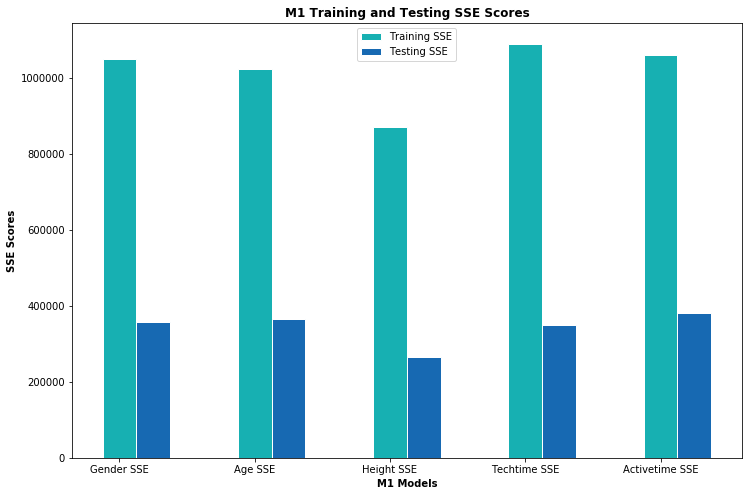

Training SSE for Model 1 (Gender) is: 1051795.1169674527
Test SSE for Model 1 (Gender) is: 357879.2549451049

Training SSE for Model 1 (Age) is: 1023198.6953659726
Test SSE for Model 1 (Age) is: 365571.3896900322

Training SSE for Model 1 (Height) is: 871340.1697636023
Test SSE for Model 1 (Height) is: 265713.09665808873

Training SSE for Model 1 (Techtime) is: 1091033.5090157776
Test SSE for Model 1 (Techtime) is: 349193.38630899345

Training SSE for Model 1 (Activetime) is: 1061808.7560180882
Test SSE for Model 1 (Activetime) is: 381905.50631207466


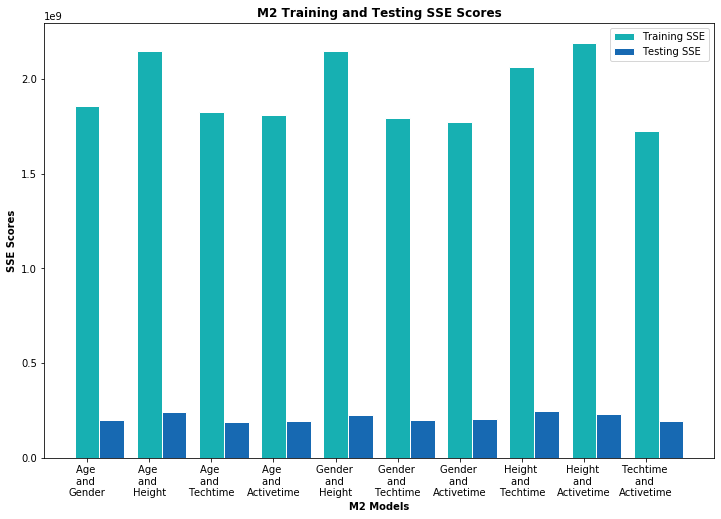

Training SSE for Model 2 (Age and Gender) is: 1857642599.755895
Test SSE for Model 2 (Age and Gender) is: 200356821.31118292

Training SSE for Model 2 (Age and Height) is: 2149608707.8878417
Test SSE for Model 2 (Age and Height) is: 242565211.0513554

Training SSE for Model 2 (Age and Techtime) is: 1823810575.7459917
Test SSE for Model 2 (Age and Techtime) is: 185750454.34667024

Training SSE for Model 2 (Age and Activetime) is: 1811704532.6721375
Test SSE for Model 2 (Age and Activetime) is: 192389339.0987105

Training SSE for Model 2 (Gender and Height) is: 2146467754.7578928
Test SSE for Model 2 (Gender and Height) is: 224109319.62875098

Training SSE for Model 2 (Gender and Techtime) is: 1791784032.1723177
Test SSE for Model 2 (Gender and Techtime) is: 196365563.73336336

Training SSE for Model 2 (Gender and Activetime) is: 1771367623.0359082
Test SSE for Model 2 (Gender and Activetime) is: 204181524.42061839

Training SSE for Model 2 (Height and Techtime) is: 2063250345.961672
Tes

In [25]:
# Plotting the SSE graphs per model.
# Here we set the width of bar.
barWidth = 0.25

Training_bar = [SSE1_train, SSE2_train, SSE3_train, SSE4_train, SSE5_train]
Testing_bar = [SSE1_test, SSE2_test, SSE3_test, SSE4_test, SSE5_test]

# Here we set the position of the bars on the x-axis.
r1 = np.arange(len(Training_bar))
r2 = [x + barWidth for x in r1]
 
# Constructing the grouped plot. 
plt.bar(r1, Training_bar, color = '#17B0B2', width = barWidth, edgecolor = 'white', label = 'Training SSE')
plt.bar(r2, Testing_bar, color = '#1769B2', width = barWidth, edgecolor = 'white', label = 'Testing SSE')


# Add xticks on the middle of the group bars.
plt.xlabel('M1 Models', fontweight = 'bold')
plt.ylabel('SSE Scores', fontweight = 'bold')
plt.xticks([r for r in range(len(Training_bar))], ['Gender SSE', 'Age SSE', 'Height SSE', 'Techtime SSE', 'Activetime SSE'])

# Setting the size of the figure. 
fig = plt.gcf()
fig.set_size_inches(12, 8)

# We create the title for the graph
plt.title("M1 Training and Testing SSE Scores", fontweight = 'bold')

# We create a legend & show the graph.
plt.legend()
plt.show()
print('Training SSE for Model 1 (Gender) is:', SSE1_train)
print('Test SSE for Model 1 (Gender) is:', SSE1_test)
print('\nTraining SSE for Model 1 (Age) is:', SSE2_train)
print('Test SSE for Model 1 (Age) is:', SSE2_test)
print('\nTraining SSE for Model 1 (Height) is:', SSE3_train)
print('Test SSE for Model 1 (Height) is:', SSE3_test)
print('\nTraining SSE for Model 1 (Techtime) is:', SSE4_train)
print('Test SSE for Model 1 (Techtime) is:', SSE4_test)
print('\nTraining SSE for Model 1 (Activetime) is:', SSE5_train)
print('Test SSE for Model 1 (Activetime) is:', SSE5_test)


# Here we set the width of bar.
barWidth = 0.4

Training_bar = [SSE6_train, SSE7_train, SSE8_train,SSE9_train, SSE10_train, SSE11_train, SSE12_train, 
                SSE13_train, SSE14_train, SSE15_train]
Testing_bar = [SSE6_test, SSE7_test, SSE8_test, SSE9_test, SSE10_test, SSE11_test, SSE12_test, 
               SSE13_test, SSE14_test, SSE15_test]

# Here we set the position of the bars on the x-axis.
r1 = np.arange(len(Training_bar))
r2 = [x + barWidth for x in r1]
 
# Constructing the grouped plot. 
plt.bar(r1, Training_bar, color = '#17B0B2', width = barWidth, edgecolor = 'white', label = 'Training SSE')
plt.bar(r2, Testing_bar, color = '#1769B2', width = barWidth, edgecolor = 'white', label = 'Testing SSE')


# Add xticks on the middle of the group bars.
plt.xlabel('M2 Models', fontweight = 'bold')
plt.ylabel('SSE Scores', fontweight = 'bold')
plt.xticks([r for r in range(len(Training_bar))], ['Age \nand \nGender', 'Age \nand \nHeight', 
                                                              'Age \nand \nTechtime', 'Age \nand \nActivetime', 
                                                              'Gender \nand \nHeight','Gender \nand \nTechtime',
                                                              'Gender \nand \nActivetime', 'Height \nand \nTechtime',
                                                              'Height \nand \nActivetime', 'Techtime \nand \nActivetime'])

# Setting the size of the figure. 
fig = plt.gcf()
fig.set_size_inches(12, 8)

# We create the title for the graph
plt.title("M2 Training and Testing SSE Scores", fontweight = 'bold')

# We create a legend & show the graph.
plt.legend()
plt.show()
print('Training SSE for Model 2 (Age and Gender) is:', SSE6_train)
print('Test SSE for Model 2 (Age and Gender) is:', SSE6_test)
print('\nTraining SSE for Model 2 (Age and Height) is:', SSE7_train)
print('Test SSE for Model 2 (Age and Height) is:', SSE7_test)
print('\nTraining SSE for Model 2 (Age and Techtime) is:', SSE8_train)
print('Test SSE for Model 2 (Age and Techtime) is:', SSE8_test)
print('\nTraining SSE for Model 2 (Age and Activetime) is:', SSE9_train)
print('Test SSE for Model 2 (Age and Activetime) is:', SSE9_test)
print('\nTraining SSE for Model 2 (Gender and Height) is:', SSE10_train)
print('Test SSE for Model 2 (Gender and Height) is:', SSE10_test)
print('\nTraining SSE for Model 2 (Gender and Techtime) is:', SSE11_train)
print('Test SSE for Model 2 (Gender and Techtime) is:', SSE11_test)
print('\nTraining SSE for Model 2 (Gender and Activetime) is:', SSE12_train)
print('Test SSE for Model 2 (Gender and Activetime) is:', SSE12_test)
print('\nTraining SSE for Model 2 (Height and Techtime) is:', SSE13_train)
print('Test SSE for Model 2 (Height and Techtime) is:', SSE13_test)
print('\nTraining SSE for Model 2 (Height and Activetime) is:', SSE14_train)
print('Test SSE for Model 2 (Height and Activetime) is:', SSE14_test)
print('\nTraining SSE for Model 2 (Techtime and Activetime) is:', SSE15_train)
print('Test SSE for Model 2 (Techtime and Activetime) is:', SSE15_test)

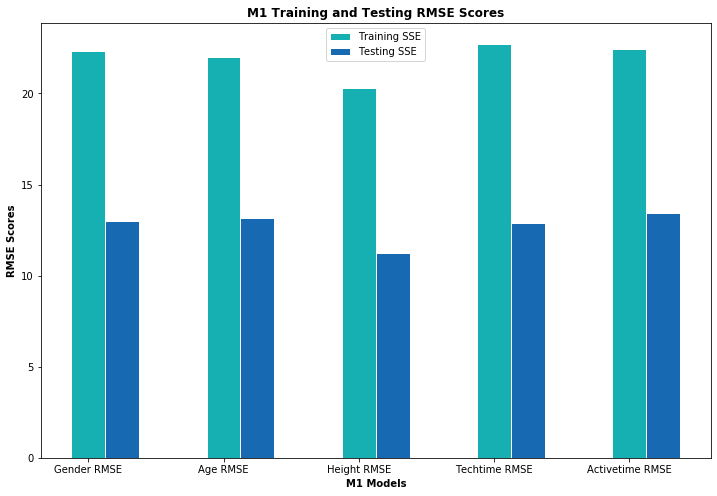

Training RMSE for Model 1 (Gender) is: 22.321401457687838
Test RMSE for Model 1 (Gender) is: 13.020394579640199

Training RMSE for Model 1 (Age) is: 22.015871017913216
Test RMSE for Model 1 (Age) is: 13.159578624112662

Training RMSE for Model 1 (Height) is: 20.316540175921922
Test RMSE for Model 1 (Height) is: 11.219212235798654

Training RMSE for Model 1 (Techtime) is: 22.733951440278744
Test RMSE for Model 1 (Techtime) is: 12.861419036221973

Training RMSE for Model 1 (Activetime) is: 22.427405454133915
Test RMSE for Model 1 (Activetime) is: 13.45035798572431


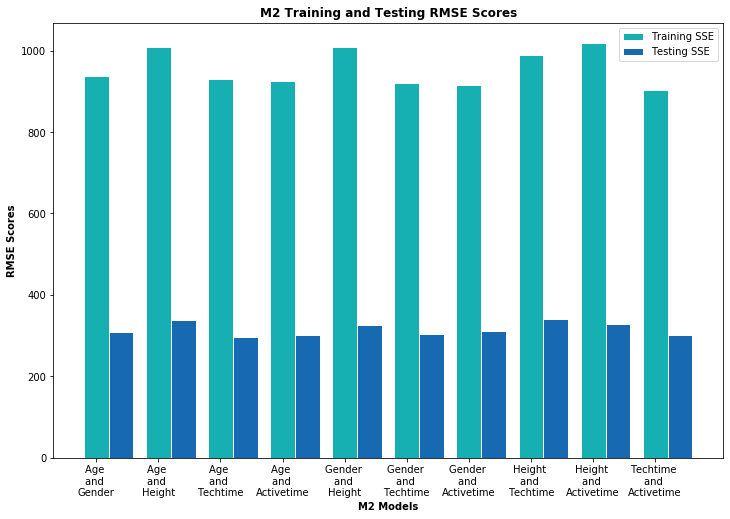

Training RMSE for Model 2 (Age and Gender) is: 938.0737088110044
Test RMSE for Model 2 (Age and Gender) is: 308.07605884694675

Training RMSE for Model 2 (Age and Height) is: 1009.1032146960586
Test RMSE for Model 2 (Age and Height) is: 338.97692863739167

Training RMSE for Model 2 (Age and Techtime) is: 929.4921968885682
Test RMSE for Model 2 (Age and Techtime) is: 296.6339300612879

Training RMSE for Model 2 (Age and Activetime) is: 926.4021809085441
Test RMSE for Model 2 (Age and Activetime) is: 301.88837153362556

Training RMSE for Model 2 (Gender and Height) is: 1008.3657073184453
Test RMSE for Model 2 (Gender and Height) is: 325.8260788318958

Training RMSE for Model 2 (Gender and Techtime) is: 921.2950003014479
Test RMSE for Model 2 (Gender and Techtime) is: 304.99207010943223

Training RMSE for Model 2 (Gender and Activetime) is: 916.0311337032932
Test RMSE for Model 2 (Gender and Activetime) is: 311.0026605437416

Training RMSE for Model 2 (Height and Techtime) is: 988.6255875

In [26]:
# Plotting the RMSE graphs per model.
# Here we set the width of bar.
barWidth = 0.25

Training_bar = [RMSE1_train, RMSE2_train, RMSE3_train, RMSE4_train, RMSE5_train]
Testing_bar = [RMSE1_test, RMSE2_test, RMSE3_test, RMSE4_test, RMSE5_test]

# Here we set the position of the bars on the x-axis.
r1 = np.arange(len(Training_bar))
r2 = [x + barWidth for x in r1]
 
# Constructing the grouped plot. 
plt.bar(r1, Training_bar, color = '#17B0B2', width = barWidth, edgecolor = 'white', label = 'Training SSE')
plt.bar(r2, Testing_bar, color = '#1769B2', width = barWidth, edgecolor = 'white', label = 'Testing SSE')


# Add xticks on the middle of the group bars.
plt.xlabel('M1 Models', fontweight = 'bold')
plt.ylabel('RMSE Scores', fontweight = 'bold')
plt.xticks([r for r in range(len(Training_bar))], ['Gender RMSE', 'Age RMSE', 'Height RMSE', 
                                                   'Techtime RMSE', 'Activetime RMSE'])

# Setting the size of the figure. 
fig = plt.gcf()
fig.set_size_inches(12, 8)

# We create the title for the graph
plt.title("M1 Training and Testing RMSE Scores", fontweight = 'bold')

# We create a legend & show the graph.
plt.legend()
plt.show()
print('Training RMSE for Model 1 (Gender) is:', RMSE1_train)
print('Test RMSE for Model 1 (Gender) is:', RMSE1_test)
print('\nTraining RMSE for Model 1 (Age) is:', RMSE2_train)
print('Test RMSE for Model 1 (Age) is:', RMSE2_test)
print('\nTraining RMSE for Model 1 (Height) is:', RMSE3_train)
print('Test RMSE for Model 1 (Height) is:', RMSE3_test)
print('\nTraining RMSE for Model 1 (Techtime) is:', RMSE4_train)
print('Test RMSE for Model 1 (Techtime) is:', RMSE4_test)
print('\nTraining RMSE for Model 1 (Activetime) is:', RMSE5_train)
print('Test RMSE for Model 1 (Activetime) is:', RMSE5_test)


# Here we set the width of bar.
barWidth = 0.4

Training_bar = [RMSE6_train, RMSE7_train, RMSE8_train, RMSE9_train, RMSE10_train, RMSE11_train, RMSE12_train, 
                RMSE13_train, RMSE14_train, RMSE15_train]
Testing_bar = [RMSE6_test, RMSE7_test, RMSE8_test, RMSE9_test, RMSE10_test, RMSE11_test, RMSE12_test, 
               RMSE13_test, RMSE14_test, RMSE15_test]

# Here we set the position of the bars on the x-axis.
r1 = np.arange(len(Training_bar))
r2 = [x + barWidth for x in r1]
 
# Constructing the grouped plot. 
plt.bar(r1, Training_bar, color = '#17B0B2', width = barWidth, edgecolor = 'white', label = 'Training SSE')
plt.bar(r2, Testing_bar, color = '#1769B2', width = barWidth, edgecolor = 'white', label = 'Testing SSE')


# Add xticks on the middle of the group bars.
plt.xlabel('M2 Models', fontweight = 'bold')
plt.ylabel('RMSE Scores', fontweight = 'bold')
plt.xticks([r for r in range(len(Training_bar))], ['Age \nand \nGender', 'Age \nand \nHeight', 
                                                              'Age \nand \nTechtime', 'Age \nand \nActivetime', 
                                                              'Gender \nand \nHeight','Gender \nand \nTechtime',
                                                              'Gender \nand \nActivetime', 'Height \nand \nTechtime',
                                                              'Height \nand \nActivetime', 'Techtime \nand \nActivetime'])

# Setting the size of the figure. 
fig = plt.gcf()
fig.set_size_inches(12, 8)

# We create the title for the graph
plt.title("M2 Training and Testing RMSE Scores", fontweight = 'bold')

# We create a legend & show the graph.
plt.legend()
plt.show()
print('Training RMSE for Model 2 (Age and Gender) is:', RMSE6_train)
print('Test RMSE for Model 2 (Age and Gender) is:', RMSE6_test)
print('\nTraining RMSE for Model 2 (Age and Height) is:', RMSE7_train)
print('Test RMSE for Model 2 (Age and Height) is:', RMSE7_test)
print('\nTraining RMSE for Model 2 (Age and Techtime) is:', RMSE8_train)
print('Test RMSE for Model 2 (Age and Techtime) is:', RMSE8_test)
print('\nTraining RMSE for Model 2 (Age and Activetime) is:', RMSE9_train)
print('Test RMSE for Model 2 (Age and Activetime) is:', RMSE9_test)
print('\nTraining RMSE for Model 2 (Gender and Height) is:', RMSE10_train)
print('Test RMSE for Model 2 (Gender and Height) is:', RMSE10_test)
print('\nTraining RMSE for Model 2 (Gender and Techtime) is:', RMSE11_train)
print('Test RMSE for Model 2 (Gender and Techtime) is:', RMSE11_test)
print('\nTraining RMSE for Model 2 (Gender and Activetime) is:', RMSE12_train)
print('Test RMSE for Model 2 (Gender and Activetime) is:', RMSE12_test)
print('\nTraining RMSE for Model 2 (Height and Techtime) is:', RMSE13_train)
print('Test RMSE for Model 2 (Height and Techtime) is:', RMSE13_test)
print('\nTraining RMSE for Model 2 (Height and Activetime) is:', RMSE14_train)
print('Test RMSE for Model 2 (Height and Activetime) is:', RMSE14_test)
print('\nTraining RMSE for Model 2 (Techtime and Activetime) is:', RMSE15_train)
print('Test RMSE for Model 2 (Techtime and Activetime) is:', RMSE15_test)


So, now that we have our regression, SSE, and RMSE graphs, its time to choose a model that best fits our data. 

Originally Time Spent With Technology (TUE) and Physical Activity Frequency (FAF) showed little to no effect on increasing or decreasing weight. However, after having run our data through secondary multivariate (M2) models, we saw that models with Techtime and Activetime were the best fitting models for our dataset because they consistently scored lower than other models that did not include them.

Thus we can state that the top five models that fit our data the best are:

- **Techtime and Activetime:** With a test RMSE score of 305.27
- **Age and Activetime:** With a test RMSE score of 307.96
- **Age and Techtime:** With a test RMSE score of 309.96
- **Age and Gender:** With a test RMSE score of 310.81
- **Gender and Activetime:** With a test RMSE score of 314.92


## Second Analysis: Clustering 

So we've run through our data using linear regression and refined a handful of models

In [27]:
ObesityData.shape

(2111, 17)

In [31]:
#Redefining the original dataset, then dropping anything that might not be relevant to the clustering.
eatingHabits = pd.read_csv("ObesityDataSet.csv")
eatingHabits = eatingHabits[['Gender','Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']]
eatingHabits.head()

,Gender,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,Female,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,Female,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,Male,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,Male,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,Male,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


In [32]:
# Using pd.dummies to get one-hot encoded version of dataset.
# Checking columns to see if we one-hot encoded correctly.
eatingHabits = pd.get_dummies(eatingHabits)
eatingHabits.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

Now that our dataset is modified correctly to begin clustering, we start this section of our analysis by K-means clustering for model building. 

In [33]:
# First, we zero-mean the data so the data has a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
eatingData = scaler.fit_transform(eatingHabits[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']])
# We then concatenate the previous gender columns to what we already have.
eatingData = np.concatenate((eatingData, eatingHabits[['Gender_Female', 'Gender_Male']].to_numpy()), axis = 1)

In [35]:
# Now we create the kmeans model. We do this in a function so that we can create models that result in different numbers 
# of clusters.

def createKMeans(data, cluster_num):
    #initialize the KMeans centroids and number of clusters
    kmeans = KMeans(init='random', n_clusters = cluster_num, random_state = 9)
    
    #return the model
    return kmeans

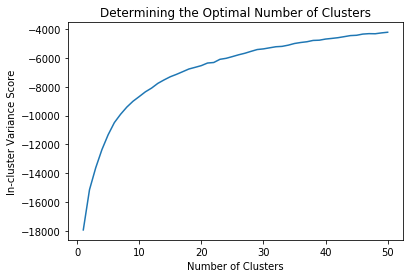

In [36]:
# Now that we have the KMeans function, we run it to create the model for different numbers
# of clusters and look at the score to determine which cluster is the best.
scores = []

for num in range(1,51):
    kmeans = createKMeans(eatingData, num)
    # Fitting the data to the model.
    kmeans.fit(eatingData)
    # Getting the score of the data which was fitted to the model and append to scores.
    scores.append(kmeans.score(eatingData))

# Now we plot the scores and use the elbow rule to check how many clusters is optimal for clustering
plt.plot(range(1,51), scores)
plt.title('Determining the Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('In-cluster Variance Score')
plt.show()

Looking at the curve, we determined that using that around 5-10 clusters would be good for clustering as the variance started flattening out as the number of clusters went past 10.

In [38]:
kmeans_model = createKMeans(eatingData, 5)

# Refitting the data to the model.
kmeans_model.fit(eatingData)

# Getting the cluster membership for the data.
cluster = kmeans_model.predict(eatingData)

Now we move on to the PCA and visualization section of this analysis. Since we had 10 features in our dataset, we needed to conduct PCA on the data and project it onto two components so that we could plot our clusters. 

In [39]:
# Creating a PCA.
pca = PCA(n_components = 2)

# Fitting the data to the PCA.
pca.fit(eatingData)

# Put data into the PCA space with 2 components.
eatingData_reduced = pca.transform(eatingData)

# Confirming the shape - should be the number of data samples X the component space.
eatingData_reduced.shape

(2111, 2)

In [41]:
# We fit the centroids of each cluster into pca space as well.
centroids_reduced = pca.transform(kmeans_model.cluster_centers_)

# Confirming the shape once more, as it should be number of clusters*PCA component space.
centroids_reduced.shape

(5, 2)

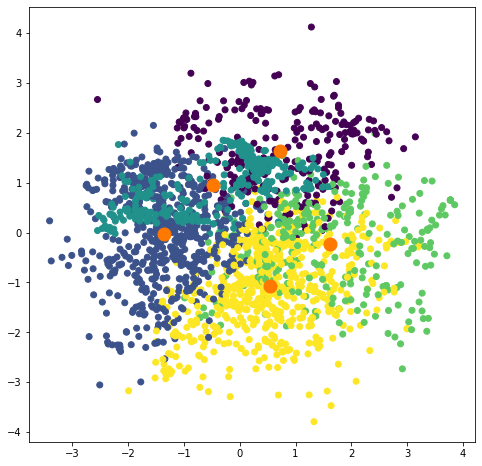

In [92]:
#visualize the clustered data and their centroids
fig, ax = plt.subplots(figsize = (8,8))
clusterPlot = ax.scatter(eatingData_reduced[:,0], eatingData_reduced[:,1], c = cluster, cmap = 'viridis' )
ax.scatter(centroids_reduced[:,0], centroids_reduced[:,1], marker = 'o', s = 169, linewidths = 1, color = '#FF7800')
plt.show()

Last thing to do is to analyse our clusters based on the various calculations.

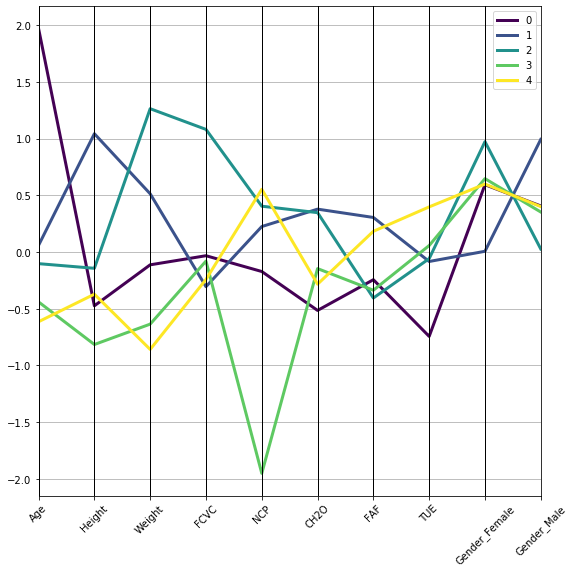

In [93]:
# Create dataframe based on centroids.
centroids = pd.DataFrame(kmeans_model.cluster_centers_, columns = eatingHabits.columns)
centroids['Cluster'] = centroids.index

# Plot the parallel coordinates to see the analyzed clusters.
plt.figure(figsize = (9,9))
plt.xticks(rotation = 45)
pd.plotting.parallel_coordinates(centroids, class_column = 'Cluster', colormap = 'viridis', linewidth = 3)
plt.show()

We then partitioned our data of eating habits into 5 clusters. To determine how these clusters were formed, we analyzed the parallel coordinate plot from the pandas library.
1. For cluster 0, the purple cluster, we notice that this cluster was formed based on a high proportion of age and females. <br>
2. For cluster 1, the blue cluster, there is a high proportion of males and height. <br>
3. For cluster 2, the teal cluster, we see that there is a high proportion of female and weight <br>
4. For cluster 3, the green cluster, we see low NCP and high rankings for FCVC. There is also a greater proportion of females. <br>
5. For cluster 4, the yellow cluster, we see high proportions of females and NCP. <br>
<br>

In [94]:
eatingData_df = pd.DataFrame(eatingData, columns = eatingHabits.columns)
eatingData_df['Cluster'] = cluster

In [95]:
def maxdistfromcentroid(cluster, centroid):
    max_dist = 0
    for data in cluster:
        temp = np.linalg.norm(data-centroid)
        if temp > max_dist:
            max_dist = temp
    return max_dist

In [96]:
def avgdistfromcentroid(cluster, centroid):
    avg_dist = 0
    for data in cluster:
        avg_dist += np.linalg.norm(data-centroid)
    return avg_dist/len(cluster)

In [97]:
for i in range(5):
    cluster_ = eatingData_df[eatingData_df['Cluster'] == i].drop(columns = ['Cluster']).to_numpy()
    centroid_ = kmeans_model.cluster_centers_[i]
    max_distance = maxdistfromcentroid(cluster_, centroid_)
    avg_distance = avgdistfromcentroid(cluster_, centroid_)
    print('Cluster', i)
    print('Centroid', str(i+1) + ':', centroid_)
    print('Number of observations:', len(cluster_))
    print('Maximum distance from centroid:', max_distance)
    print('Average distance from centroid:', avg_distance)
    print()

Cluster 0
Centroid 1: [ 1.97054176 -0.47426073 -0.11276945 -0.032497   -0.17172933 -0.51486148
 -0.24409226 -0.74389327  0.59375     0.40625   ]
Number of observations: 256
Maximum distance from centroid: 5.168246108982701
Average distance from centroid: 2.394331622570507

Cluster 1
Centroid 2: [ 0.05912637  1.04344179  0.51361939 -0.3054928   0.2247369   0.37825849
  0.30487472 -0.08341364  0.00655738  0.99344262]
Number of observations: 610
Maximum distance from centroid: 4.160046797828287
Average distance from centroid: 2.2245743833865776

Cluster 2
Centroid 3: [-0.10249783 -0.14342319  1.26400701  1.08144661  0.40415272  0.34732841
 -0.40541371 -0.05836476  0.97345133  0.02654867]
Number of observations: 339
Maximum distance from centroid: 3.6150385458284453
Average distance from centroid: 1.7110953887568607

Cluster 3
Centroid 4: [-0.4398354  -0.8154928  -0.63580562 -0.07993277 -1.95165967 -0.1461136
 -0.3368373   0.05729826  0.64726027  0.35273973]
Number of observations: 292
Max

## Results:

With all that hefty analysis completed, and a plethra of models in our grasp, we can now begin drawing some results from our data. 

In the linear regression section, we formulated 15 different models and tested all  of them, and wound up with 5 that fit our data best when predicting weight. Those models were:

- Techtime and Activetime: With a test RMSE score of 305.27
- Age and Activetime: With a test RMSE score of 307.96
- Age and Techtime: With a test RMSE score of 309.96
- Age and Gender: With a test RMSE score of 310.81
- Gender and Activetime: With a test RMSE score of 314.92


After formulating 5 clusters and using the parallel coordinates graph from above, we ranked the aforementioned clusters by the highest number of weight attributes in them, giving a better indicator of what affected weight. 



- Cluster 2, the teal cluster, came in first with being the cluster with most weight grouped into it. It was formed from a high proportion of females and weight.
- Cluster 1, the blue cluster, came in second place for most weight data points in its cluster, and it was formed from a high proportion of males and height.
- Cluster 0, the purple cluster, was ranked in the middle. It's data was mainly formed from a high proportion of age and females.
- Cluster 3, the green cluster, was second to last. It's data clusters were slightly composed of weight inputs, but overall it was formed from a high proportion of FCVC and females.
- Cluster 4, the yellow cluster, ranked at the bottom of our list with little to none of its data being clustered with weight. It was primarily formed from high proportions of females and NCP.



To sum up our results, through linear regression analysis we were able to determine which models gave us the best fit for our data. The attributes which helped predict weight the most were age, activetime, techtime, and gender according to our linear regression analysis. However, our clustering analysis showed that gender, age, and height were some of the data points most commonly grouped with weight. 
Thus we determined through our analysis that Gender, and Age were the two leading predictors in weight, with height, techtime and activetime being secondary best-fits to our models.
